In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Clients dataset - too easy

<b>This dataset was too easy to predict and didn't let test the usage of data balancing</b>

In [2]:
df1 = pd.read_csv('is-this-a-good-customer\\clients.csv')
print(df1)

      month  credit_amount  credit_term  age     sex  \
0         1           7000           12   39    male   
1         1          19000            6   20    male   
2         1          29000           12   23  female   
3         1          10000           12   30    male   
4         1          14500           12   25  female   
...     ...            ...          ...  ...     ...   
1718     12          18500            6   32    male   
1719     12           6500            6   24    male   
1720     12           5500           12   21    male   
1721     12          30500           10   25  female   
1722     12         116000           24   34    male   

                        education          product_type  having_children_flg  \
0     Secondary special education           Cell phones                    0   
1     Secondary special education  Household appliances                    1   
2     Secondary special education  Household appliances                    0   
3     S

In [3]:
pd.value_counts(df1['bad_client_target'])

0    1527
1     196
Name: bad_client_target, dtype: int64

## Hypothyroid dataset

In [4]:
df = pd.read_csv('dataset_57_hypothyroid\\dataset_57_hypothyroid.csv')
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [ ]:
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 50)

### Show target class frequency

                         Class          %
negative                  3481  92.285260
compensated_hypothyroid    194   5.143160
primary_hypothyroid         95   2.518558
secondary_hypothyroid        2   0.053022


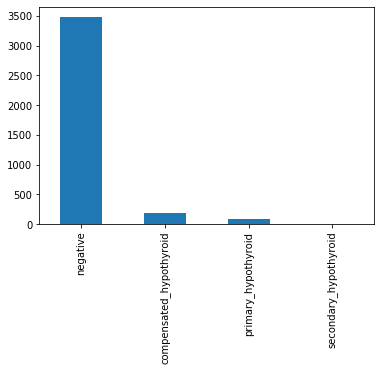

In [7]:
vc = pd.DataFrame(pd.value_counts(df['Class']))
vc['%'] = vc['Class'] / len(df) * 100
print(vc)
pd.value_counts(df['Class']).plot.bar()
plt.show()

# Perform standard prediction

### Replace missing data marks '?' with a 'nan' (important)

In [8]:
import numpy as np
df = df.replace(to_replace='?', value=np.nan)

### Define inputs/outputs

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Define transformers using pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

### Apply transformers to dataframe columns (doesn't work)

In [7]:
# Select sets of features by data types (doesn't work since all columns after
# loading dataset are interpreted as 'object', including numeric)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Apply transformers - pick column types manually - use this

In [11]:
# Select sets of features by data types
numeric_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_features = list(set(X.columns).difference(set(numeric_features)))

# print(numeric_features)
# print(categorical_features)
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Perform transformation on X

In [12]:
X_tf = preprocessor.fit_transform(X)

In [13]:
print(X_tf[0])
print('X shape:', X_tf.shape)

[-0.5346941  -0.1469579   0.66277818  0.49271806  0.79130069 -0.03556141
  1.          1.          0.          1.          0.          1.
  0.          1.          0.          1.          0.          1.
  0.          1.          0.          1.          0.          1.
  0.          0.          1.          0.          1.          0.
  1.          0.          0.          0.          1.          0.
  0.          1.          1.          0.          1.          0.
  1.          0.          0.          1.          1.          0.
  0.          1.          1.          0.        ]
X shape: (3772, 52)


## Define prediction model

In [14]:
from sklearn.ensemble import (AdaBoostClassifier,
                             GradientBoostingClassifier)
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=64, max_depth=3)

## Cross-validate model

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_tf, y, cv=5, scoring='f1_macro')
scores

C:\Users\Piotr\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.72671854, 0.7293227 , 0.94212966, 0.72620546, 0.99118705])

## Evaluate with train/test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size = 0.25, random_state=1)

In [17]:
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [18]:
# Class frequency in train/test data
class_cnt = pd.DataFrame()
class_cnt['Train'] = pd.value_counts(y_train)
class_cnt['Test'] = pd.value_counts(y_test)
print(class_cnt)

                         Train  Test
negative                  2620   861
compensated_hypothyroid    139    55
primary_hypothyroid         69    26
secondary_hypothyroid        1     1


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2829, 52)
(943, 52)
(2829,)
(943,)


### Fit and make prediction

In [20]:
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=64)

In [21]:
y_dash = model.predict(X_test)

In [ ]:
y_test = np.array(y_test)
for i in range(len(y_test)):
    print('{} - {}'.format(y_test[i], y_dash[i]))

### Print results

In [23]:
import sklearn.metrics as metrics

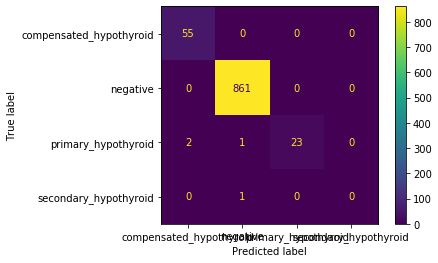

In [24]:
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [25]:
print('F1 macro:', metrics.f1_score(y_test, y_dash, average='macro'))
print('F1 micro:', metrics.f1_score(y_test, y_dash, average='micro'))
print('F1 weighted:', metrics.f1_score(y_test, y_dash, average='weighted'))

F1 macro: 0.7299395686348785
F1 micro: 0.9957582184517497
F1 weighted: 0.9951507746563846


In [26]:
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_dash))
print('Accuracy:', metrics.accuracy_score(y_test, y_dash))
print('Precision:', metrics.precision_score(y_test, y_dash))
print('Recall:', metrics.recall_score(y_test, y_dash))
print('F1:', metrics.f1_score(y_test, y_dash))

Confusion matrix:
 [[ 55   0   0   0]
 [  0 861   0   0]
 [  2   1  23   0]
 [  0   1   0   0]]
Accuracy: 0.9957582184517497


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Approach with making data balanced (To do)